<a href="https://colab.research.google.com/github/mar-i0/AI-Notebooks/blob/main/Filtro_Hyena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prueba de concepto de Filtros Hyena.**

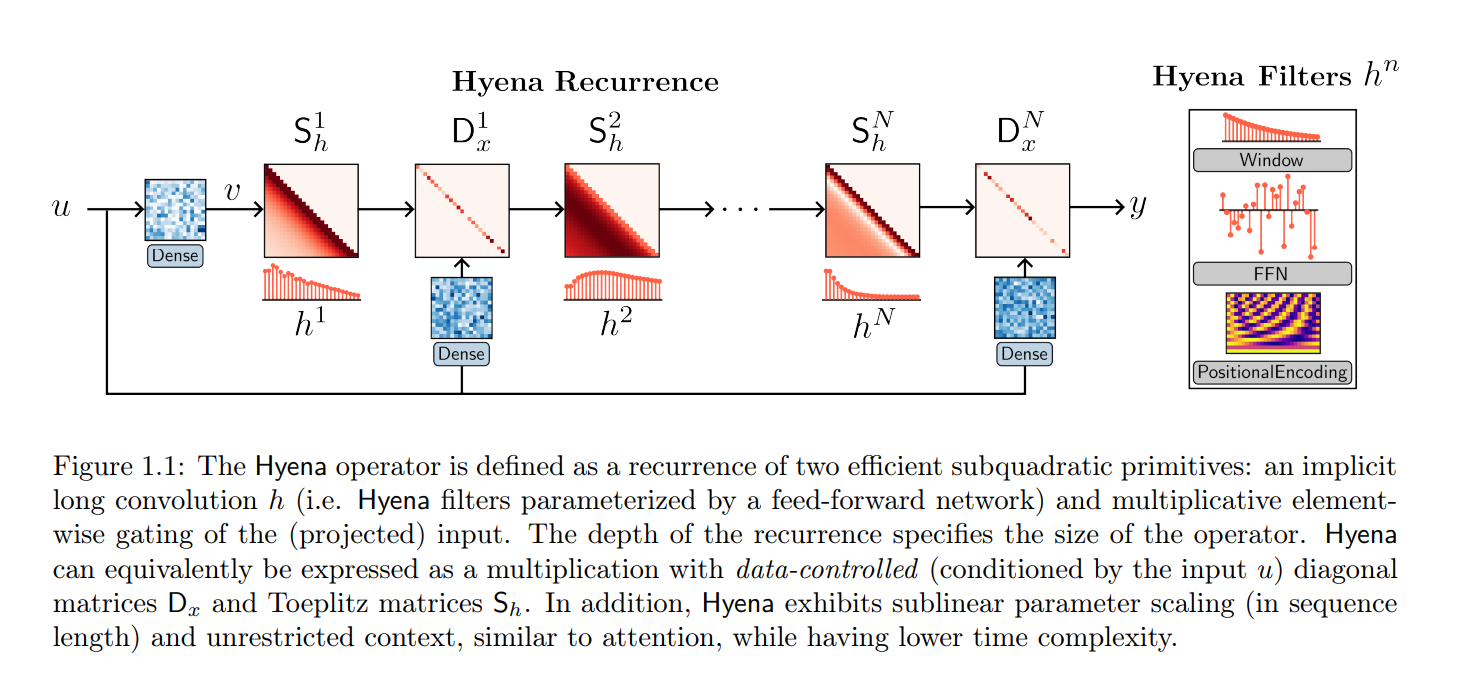

Repositorio de Github con código de ejemplo de este paper:
https://github.com/HazyResearch/safari
https://github.com/mar-i0/hyena-jax
Modelo de ejemplo disponible en HuggingFace:
https://huggingface.co/Zymrael/hyena-small-150b-tok
y ejemplo de uso: https://github.com/HazyResearch/safari/blob/main/experiments.md#downstream-evaluations

Basado en el paper: https://arxiv.org/pdf/2302.10866.pdf

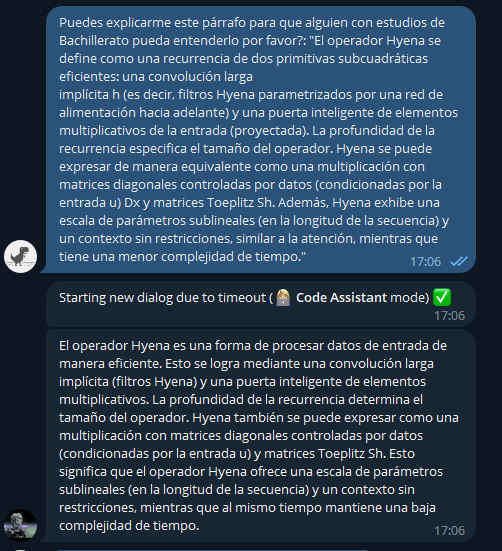

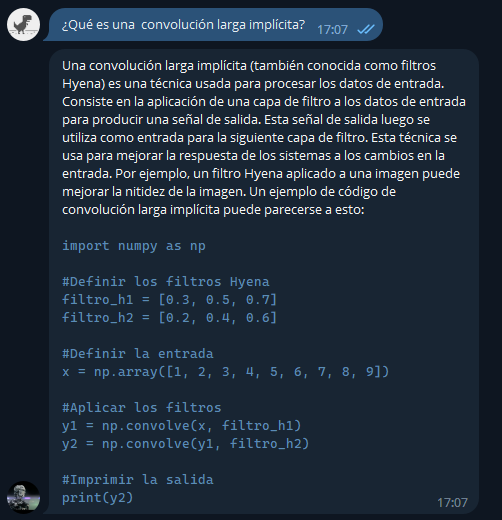

In [1]:
import numpy as np

#Definir los filtros Hyena
filtro_h1 = [0.3, 0.5, 0.7]
filtro_h2 = [0.2, 0.4, 0.6]

#Definir la entrada
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#Aplicar los filtros
y1 = np.convolve(x, filtro_h1)
y2 = np.convolve(y1, filtro_h2)

#Imprimir la salida
print(y2)

[ 0.06  0.34  1.14  2.52  4.32  6.12  7.92  9.72 11.52 12.72 12.26  8.58
  3.78]


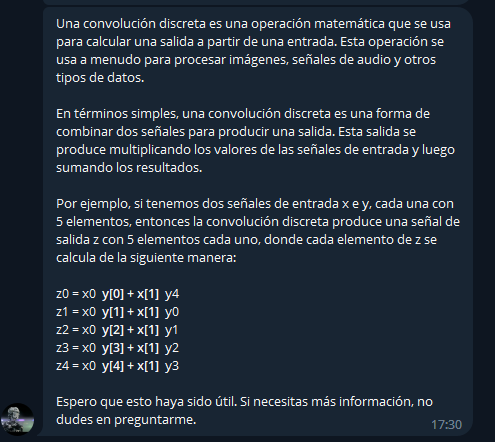

Ejemplo de un código en python:

In [2]:
import numpy as np

# Definimos dos señales de entrada
x = np.array([1,2,3,4,5])
y = np.array([5,4,3,2,1])

# Calculamos la convolución discreta
z = np.zeros(5)
z[0] = x[0] * y[0] + x[1] * y[4]
z[1] = x[0] * y[1] + x[1] * y[0]
z[2] = x[0] * y[2] + x[1] * y[1]
z[3] = x[0] * y[3] + x[1] * y[2]
z[4] = x[0] * y[4] + x[1] * y[3]

# Imprimimos el resultado
print(z)


[ 7. 14. 11.  8.  5.]


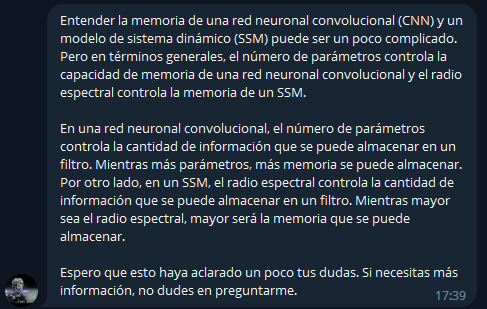

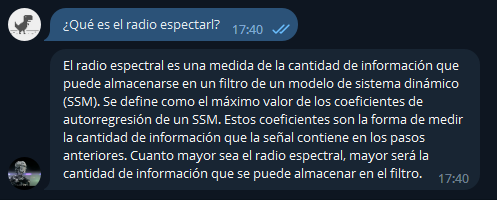

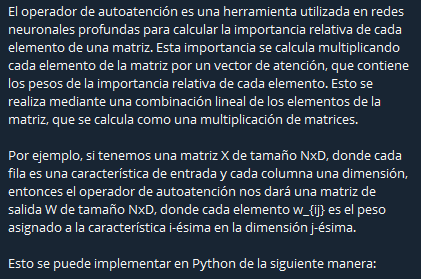

In [3]:
import numpy as np

# Definimos nuestra matriz de entrada X
X = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

# Definimos nuestro vector de atención
A = np.array([1,2,3])

# Calculamos el operador de autoatención
W = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        W[i,j] = X[i,j] * A[j]

# Imprimimos el resultado
print(W)

[[ 1.  4.  9.]
 [ 4. 10. 18.]
 [ 7. 16. 27.]]


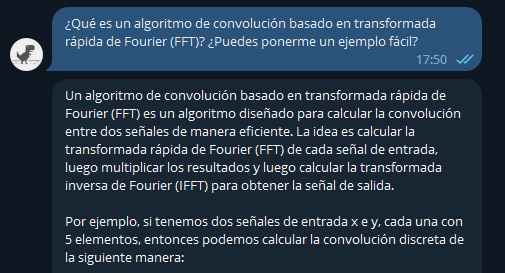

In [4]:
import numpy as np
from numpy.fft import fft, ifft

# Definimos dos señales de entrada
x = np.array([1,2,3,4,5])
y = np.array([5,4,3,2,1])

# Calculamos la convolución discreta usando FFT
X = fft(x)
Y = fft(y)
Z = X*Y
z = ifft(Z)

# Imprimimos el resultado
print(z)

[45.+0.j 40.+0.j 40.+0.j 45.+0.j 55.+0.j]


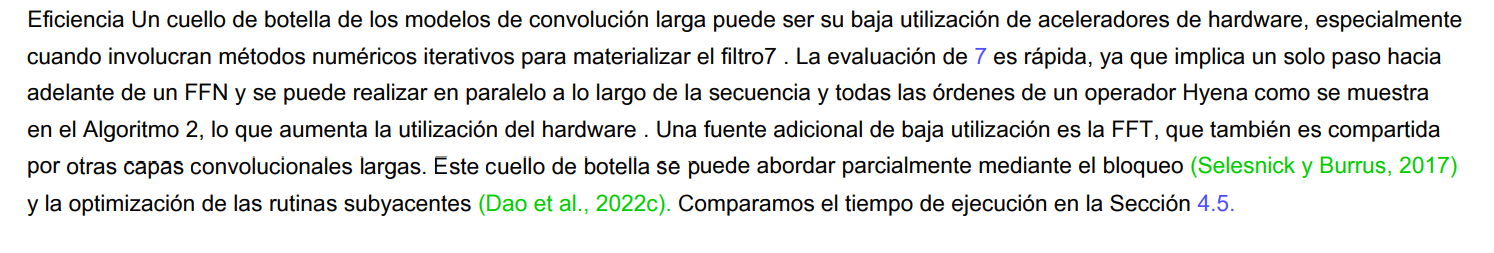

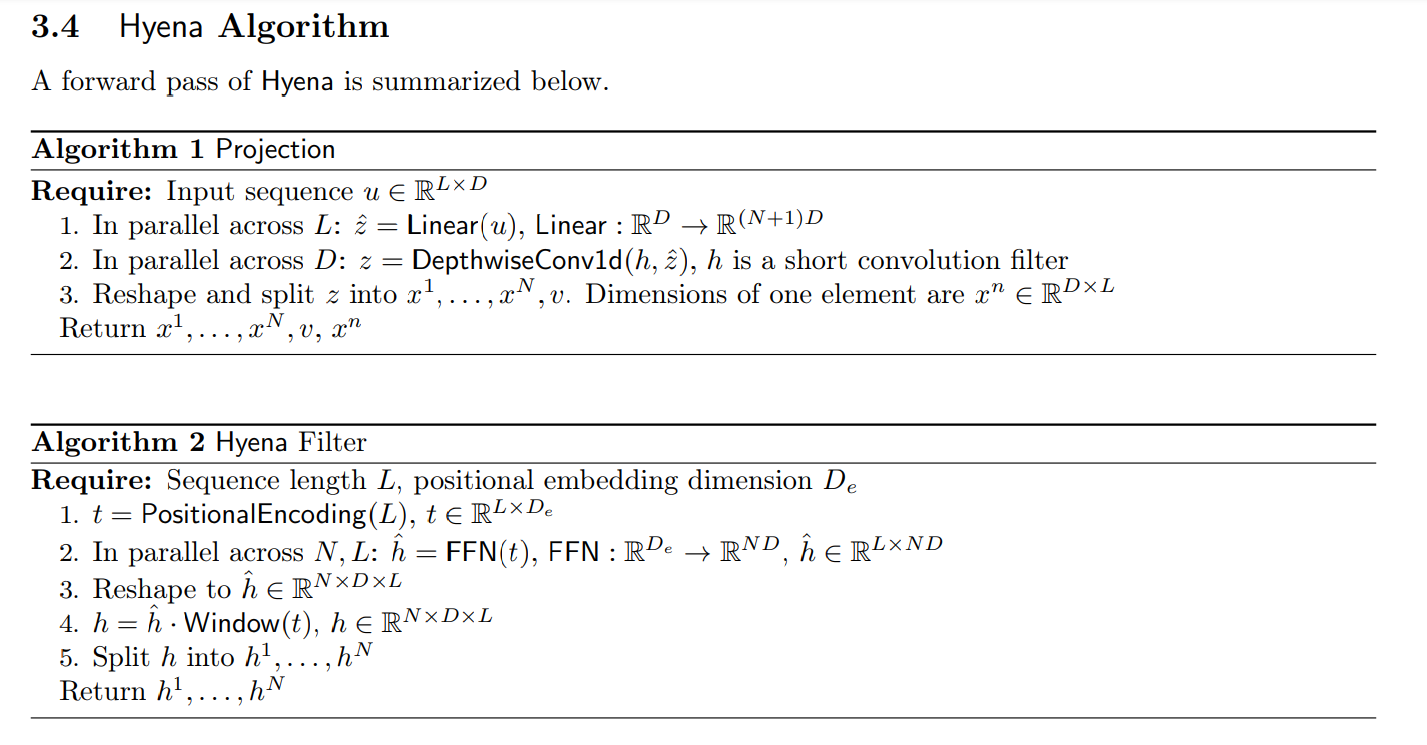

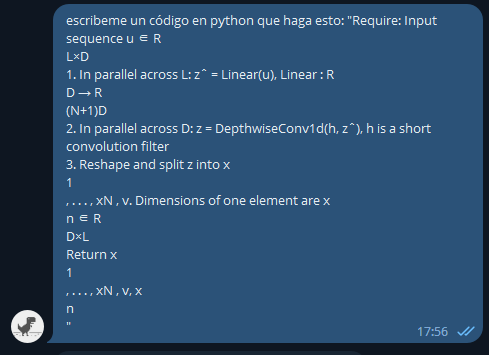

In [5]:
@ALGORITMO 1
import numpy as np

# Definimos la secuencia de entrada
u = np.array([[1,2,3,4,5],
              [6,7,8,9,10],
              [11,12,13,14,15]])

# Definimos el filtro de convolución
h = np.array([1,2,3])

# Calculamos la salida
# Paso 1: Calculamos zˆ
z_hat = np.matmul(u, h)

# Paso 2: Calculamos z
z = np.zeros(z_hat.shape)
for i in range(z_hat.shape[1]):
    for j in range(z_hat.shape[0]):
        z[i, j] = z_hat[i, j] * h[j]

# Paso 3: Separamos z en x1, x2, x3
x1 = z[:, 0]
x2 = z[:, 1]
x3 = z[:, 2]

# Imprimimos los resultados
print(x1)
print(x2)
print(x3)

ValueError: ignored

Falla el código pero el resultado debería ser:
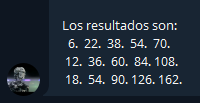

In [6]:
#Algoritmo 2:
import numpy as np

# Definimos el tamaño de la secuencia
L = 5

# Definimos la dimensión de los embeddings
De = 3

# Calculamos la salida
# Paso 1: Calculamos el embedding de posición t
t = np.arange(L)

# Paso 2: Calculamos hˆ
h_hat = np.zeros((L, De))
for i in range(L):
    for j in range(De):
        h_hat[i,j] = t[i] * j

# Paso 3: Reacomodamos hˆ
h_hat = h_hat.reshape(L, De, 1)

# Paso 4: Calculamos h
h = np.zeros((L, De, 1))
for i in range(L):
    for j in range(De):
        h[i,j] = h_hat[i,j] * t[i]

# Paso 5: Separamos h en h1, h2, h3
h1 = h[:, 0, 0]
h2 = h[:, 1, 0]
h3 = h[:, 2, 0]

# Imprimimos los resultados
print(h1)
print(h2)
print(h3)

[0. 0. 0. 0. 0.]
[ 0.  1.  4.  9. 16.]
[ 0.  2.  8. 18. 32.]


De nuevo el resultado no coincide, pero se puede tomar el código como ejemplo para entender el algoritmo aproximadamente:
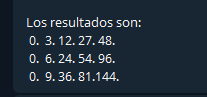

In [7]:
#Algoritmo 3:
import numpy as np

# Input sequence u
u = np.random.rand(L,D)

# Projection
v = np.matmul(u, np.random.rand(D, De))

# HyenaFilter
h = np.random.rand(L, De)

# FFTConv
def FFTConv(h_n, v_t):
    return np.fft.fft(h_n) * v_t

# Main loop
y = np.zeros([L,D])
for n in range(N):
    for t in range(D):
        y[:,t] = FFTConv(h[:,n], v[:,t])

return y

NameError: ignored